# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Kurnia Raihan Ardian
- Email: raihanardila22@gmail.com
- Id Dicoding: raihanardila

# Business Understanding
Jaya Jaya Institut mengalami masalah tingginya angka *dropout* atau putus studi. Hal ini berdampak buruk terhadap reputasi institusi. Tujuan dari proyek ini adalah untuk membangun sistem prediktif menggunakan machine learning agar dapat mengidentifikasi siswa yang berpotensi dropout sejak dini. Dengan demikian, pihak institusi dapat memberikan perhatian dan intervensi khusus sebelum siswa memutuskan keluar dari institusi.

**Objective:** Memprediksi kemungkinan dropout seorang siswa berdasarkan data historis performa dan latar belakangnya.

## Persiapan

### Menyiapkan library yang dibutuhkan

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.exceptions import NotFittedError
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.feature_selection import SelectFromModel
import pickle
import warnings
from IPython.display import display
warnings.filterwarnings('ignore')

# Set style for visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


### Menyiapkan data yang akan diguankan

# Load Dataset

In [24]:
# Load data
df = pd.read_csv('data.csv', sep=';')

# Display basic info
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows of the dataset:")
display(df.head())

Dataset shape: (4424, 37)

First 5 rows of the dataset:


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

Dataset yang digunakan memuat informasi dari berbagai aspek siswa seperti:
- Status ekonomi dan latar belakang orang tua
- Status kehadiran dan nilai akademik
- Faktor eksternal seperti inflasi, pengangguran, dan GDP

Target kolom adalah `Status` yang terdiri dari dua nilai: `Dropout` dan `Graduate`.

Langkah awal:
- Memeriksa jumlah data dan distribusi label
- Meninjau missing values dan outliers
- Memahami korelasi antar fitur

# Exploratory Data Analysis


Missing values per column:

Data types:

Statistical summary of numerical features:

Unique values for categorical features:

Status: 3 unique values
Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

Target variable distribution:
Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64
Percentage of Dropout: 32.12%
Percentage of Graduate: 49.93%
Percentage of Enrolled: 17.95%


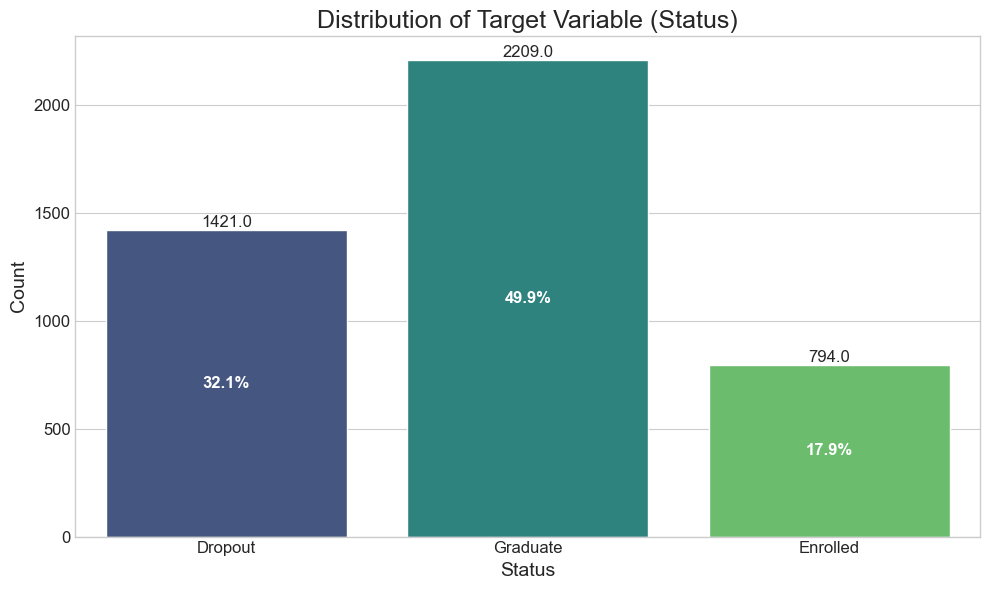

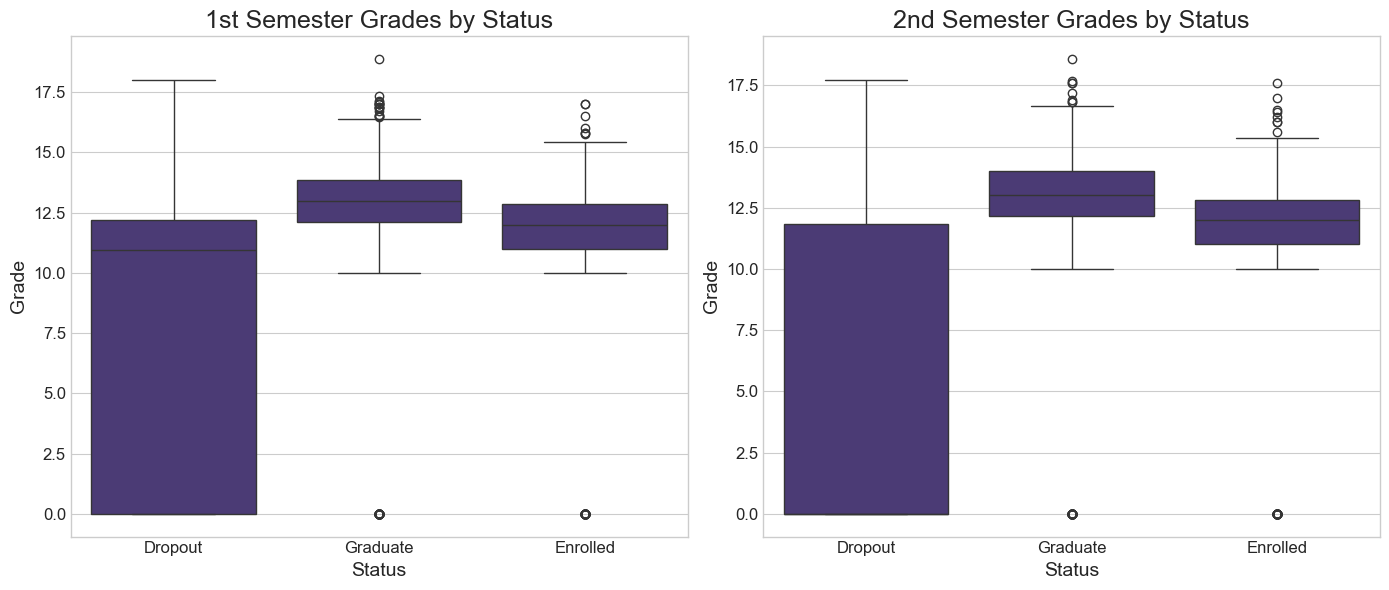

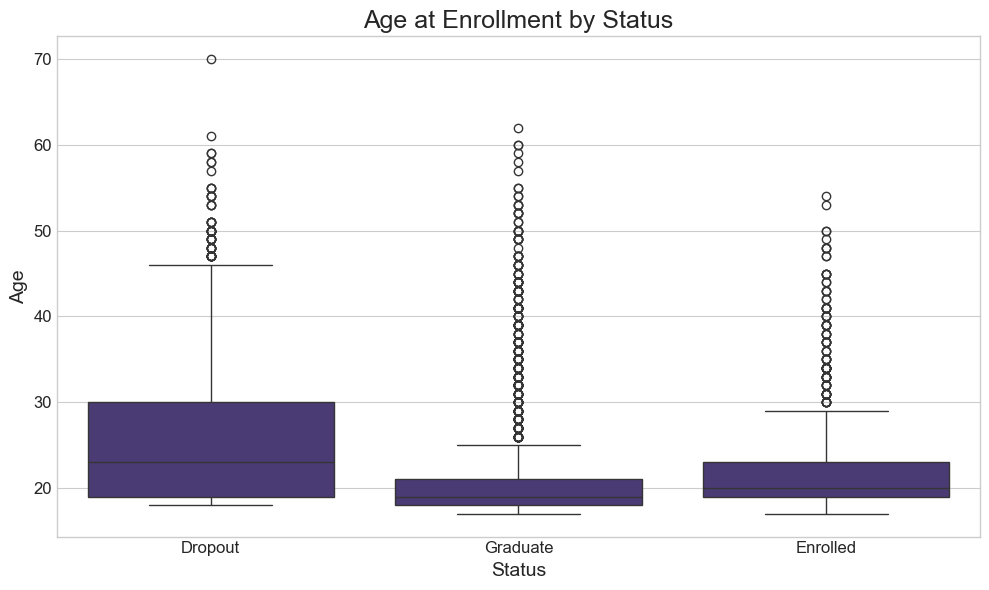

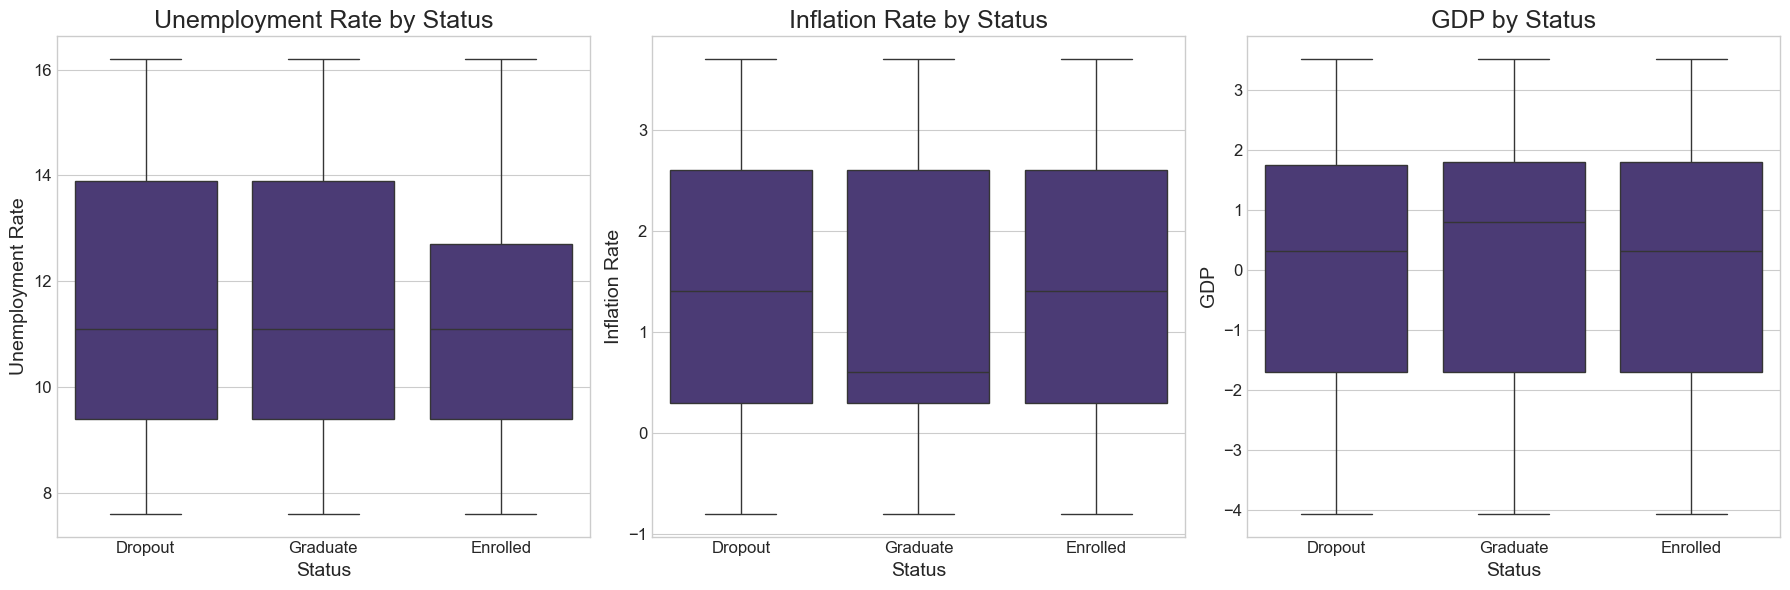

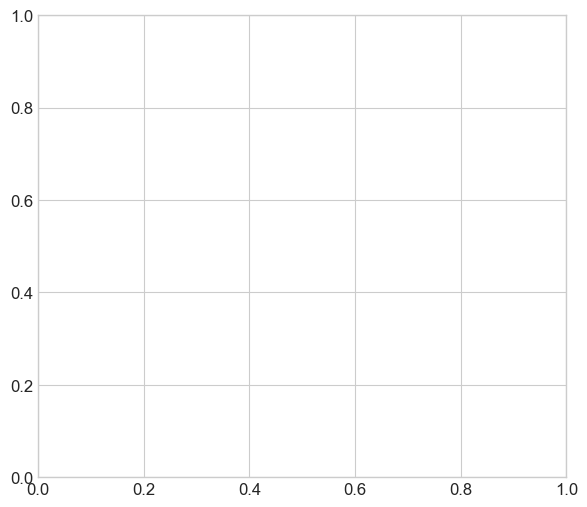

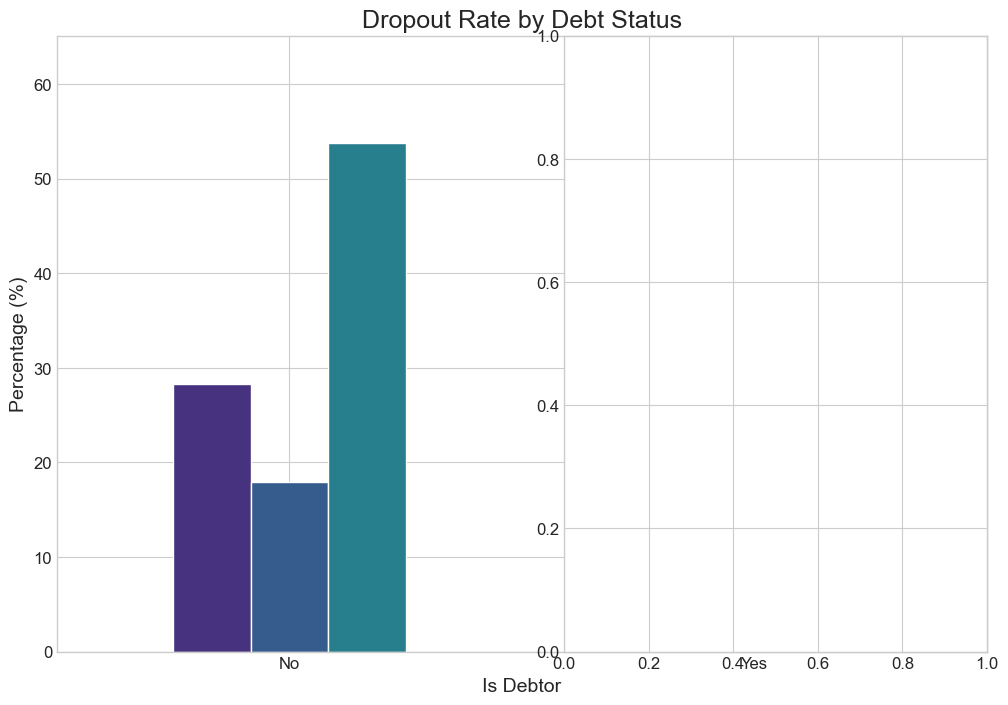

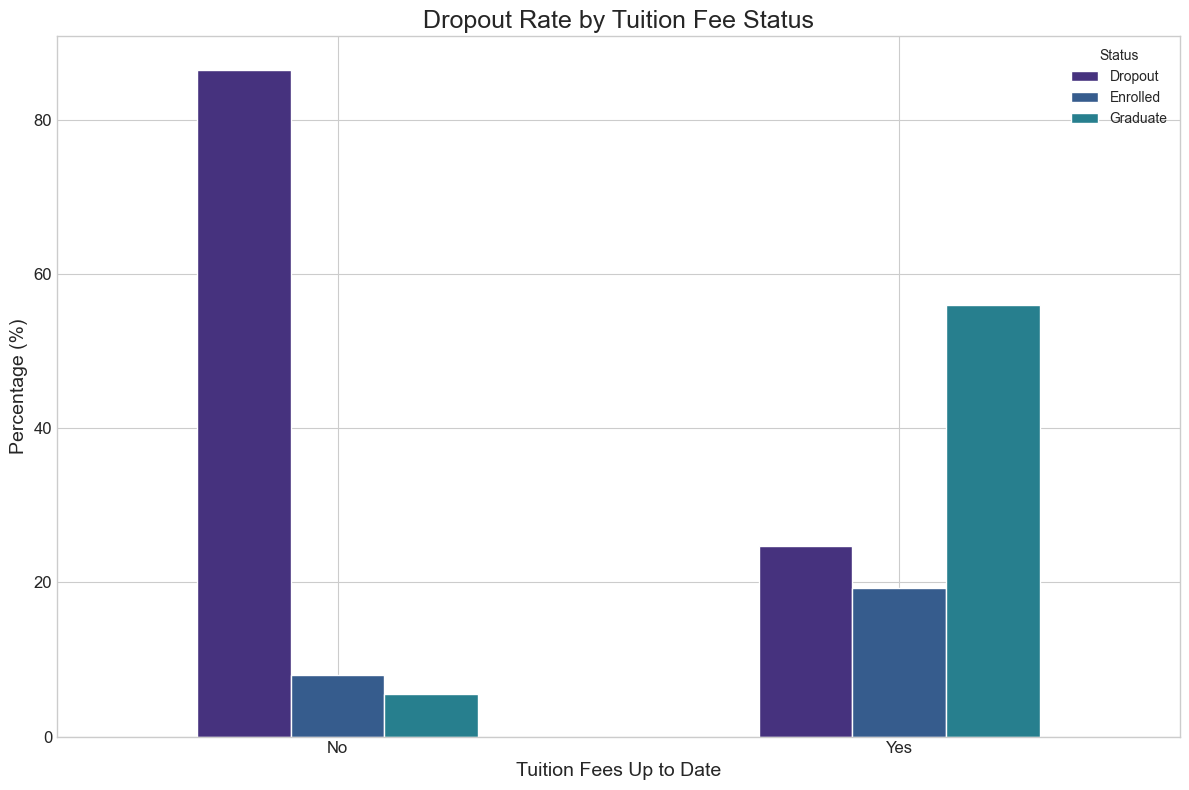

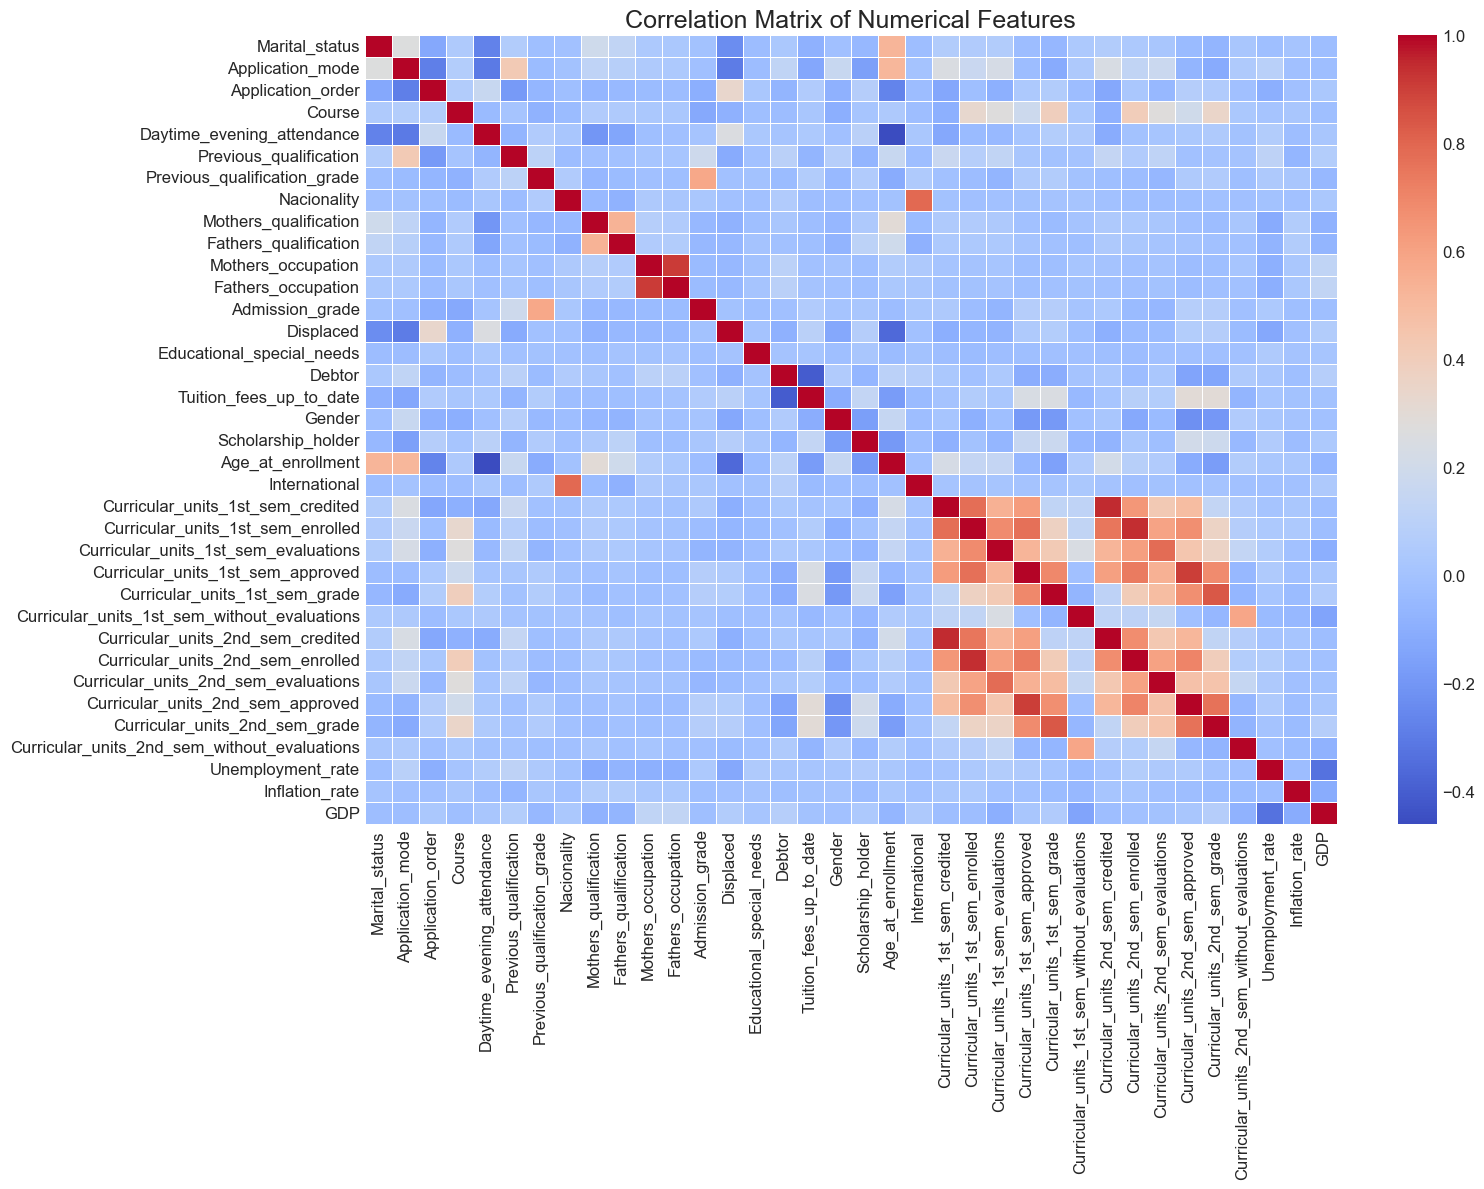


Features most correlated with Dropout:
target_numeric                                  1.000000
Age_at_enrollment                               0.254215
Debtor                                          0.229407
Gender                                          0.203983
Application_mode                                0.198458
Marital_status                                  0.093712
Curricular_units_2nd_sem_without_evaluations    0.079901
Mothers_qualification                           0.064958
Curricular_units_1st_sem_without_evaluations    0.054230
Previous_qualification                          0.049379
Inflation_rate                                  0.027826
Fathers_qualification                           0.018295
Unemployment_rate                               0.012980
Nacionality                                     0.008346
Educational_special_needs                       0.002806
International                                  -0.010360
Mothers_occupation                             -

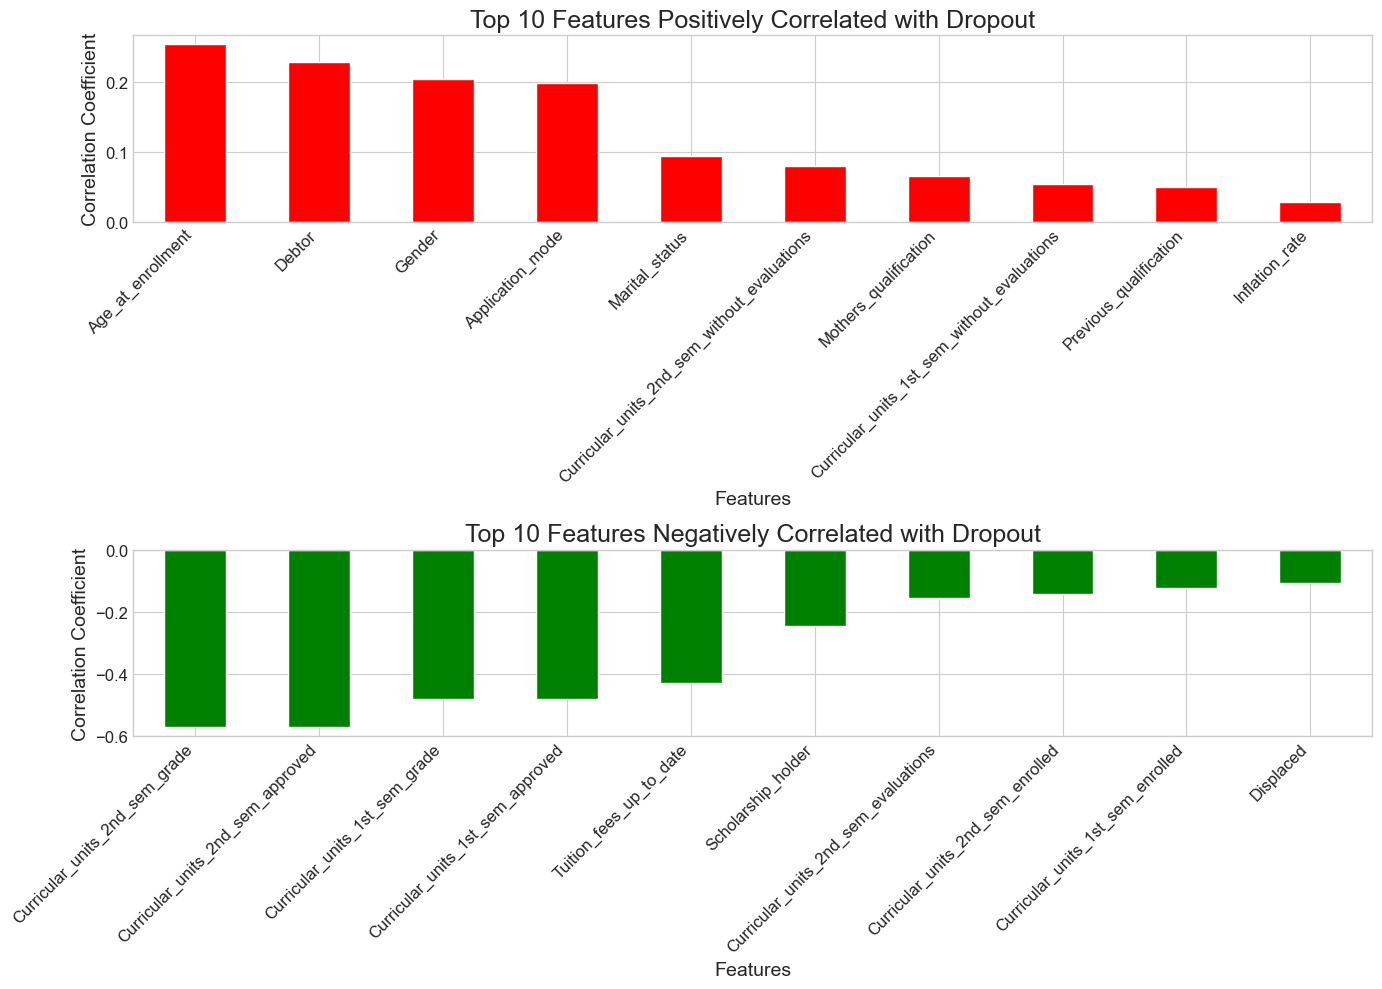

In [25]:
# Check for missing values
print("\nMissing values per column:")
missing_values = df.isnull().sum()
missing_values_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_values_percentage
})
missing_data[missing_data['Missing Values'] > 0].sort_values('Missing Values', ascending=False)

# Check datatypes
print("\nData types:")
df.dtypes

# Statistical summary of numerical features
print("\nStatistical summary of numerical features:")
df.describe()

# Get unique values for categorical features
print("\nUnique values for categorical features:")
categorical_features = df.select_dtypes(include=['object']).columns
for col in categorical_features:
    print(f"\n{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts())

# Check target variable distribution
print("\nTarget variable distribution:")
target_counts = df['Status'].value_counts()
print(target_counts)
print(f"Percentage of Dropout: {(target_counts['Dropout'] / len(df)) * 100:.2f}%")
print(f"Percentage of Graduate: {(target_counts['Graduate'] / len(df)) * 100:.2f}%")
print(f"Percentage of Enrolled: {(target_counts['Enrolled'] / len(df)) * 100:.2f}%")

# Visualize target distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Status', data=df, palette='viridis')
plt.title('Distribution of Target Variable (Status)')
plt.xlabel('Status')
plt.ylabel('Count')

# Add count labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12)

total = len(df)
for i, p in enumerate(ax.patches):
    percentage = 100 * p.get_height() / total
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                ha='center', va='center', fontsize=12, color='white', fontweight='bold')

plt.tight_layout()
plt.show()

# Analyze relationship between academic performance and dropout status
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Status', y='Curricular_units_1st_sem_grade', data=df)
plt.title('1st Semester Grades by Status')
plt.xlabel('Status')
plt.ylabel('Grade')

plt.subplot(1, 2, 2)
sns.boxplot(x='Status', y='Curricular_units_2nd_sem_grade', data=df)
plt.title('2nd Semester Grades by Status')
plt.xlabel('Status')
plt.ylabel('Grade')

plt.tight_layout()
plt.show()

# Analyze relationship between age and dropout status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Age_at_enrollment', data=df)
plt.title('Age at Enrollment by Status')
plt.xlabel('Status')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

# Analyze effect of economic factors
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='Status', y='Unemployment_rate', data=df)
plt.title('Unemployment Rate by Status')
plt.xlabel('Status')
plt.ylabel('Unemployment Rate')

plt.subplot(1, 3, 2)
sns.boxplot(x='Status', y='Inflation_rate', data=df)
plt.title('Inflation Rate by Status')
plt.xlabel('Status')
plt.ylabel('Inflation Rate')

plt.subplot(1, 3, 3)
sns.boxplot(x='Status', y='GDP', data=df)
plt.title('GDP by Status')
plt.xlabel('Status')
plt.ylabel('GDP')

plt.tight_layout()
plt.show()

# Analyze financial factors
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
crossed_data = pd.crosstab(df['Debtor'], df['Status'], normalize='index') * 100
crossed_data.plot(kind='bar', stacked=False)
plt.title('Dropout Rate by Debt Status')
plt.xlabel('Is Debtor')
plt.ylabel('Percentage (%)')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.legend(title='Status')

plt.subplot(1, 2, 2)
crossed_data = pd.crosstab(df['Tuition_fees_up_to_date'], df['Status'], normalize='index') * 100
crossed_data.plot(kind='bar', stacked=False)
plt.title('Dropout Rate by Tuition Fee Status')
plt.xlabel('Tuition Fees Up to Date')
plt.ylabel('Percentage (%)')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.legend(title='Status')

plt.tight_layout()
plt.show()

# Feature correlation analysis
# Select numerical columns for correlation analysis
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# Find features most correlated with dropout
# First, we need to convert the target variable to numerical
# Tambahkan kolom target_numeric
df['target_numeric'] = df['Status'].map({'Dropout': 1, 'Graduate': 0, 'Enrolled': 0})

# Update numerical_cols untuk menyertakan target_numeric
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Hitung ulang correlation matrix dengan kolom yang sudah diupdate
correlation_matrix = df[numerical_cols].corr()

# Sekarang ini akan berfungsi
target_correlation = correlation_matrix['target_numeric'].sort_values(ascending=False)
print("\nFeatures most correlated with Dropout:")
print(target_correlation)

# Top positive and negative correlations with dropout
plt.figure(figsize=(14, 10))

# Positive correlations
pos_corr = target_correlation[target_correlation > 0].drop('target_numeric').nlargest(10)
plt.subplot(2, 1, 1)
pos_corr.plot(kind='bar', color='red')
plt.title('Top 10 Features Positively Correlated with Dropout')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')

# Negative correlations
neg_corr = target_correlation[target_correlation < 0].nsmallest(10)
plt.subplot(2, 1, 2)
neg_corr.plot(kind='bar', color='green')
plt.title('Top 10 Features Negatively Correlated with Dropout')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


## Data Preparation / Preprocessing

Pada tahap ini, kita akan melakukan:
- Penanganan missing values
- Encoding variabel kategorikal
- Normalisasi atau standarisasi jika diperlukan
- Pemisahan data untuk pelatihan dan pengujian

# Save Model

In [26]:
# First, let's clean up the target variable for binary classification
# We'll focus on predicting "Dropout" vs "Not Dropout"
df['target_binary'] = df['Status'].apply(lambda x: 1 if x == 'Dropout' else 0)

# Print the binary target distribution
print("Binary target distribution:")
print(df['target_binary'].value_counts())
print(f"Percentage of Dropout: {(df['target_binary'].sum() / len(df)) * 100:.2f}%")
print(f"Percentage of Not Dropout: {((1 - df['target_binary']).sum() / len(df)) * 100:.2f}%")

# Split the data into features and target
X = df.drop(['Status', 'target_numeric', 'target_binary'], axis=1)
y = df['target_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Get all column names for preprocessing
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print(f"Number of numeric features: {len(numeric_features)}")
print(f"Number of categorical features: {len(categorical_features)}")

# Misahkan kolom numerik dan kategorik
numeric_cols = [
    'Age_at_enrollment', 'Admission_grade', 'Previous_qualification_grade',
    'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_evaluations',
    'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
    'Curricular_units_1st_sem_without_evaluations', 'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade', 'Curricular_units_2nd_sem_without_evaluations',
    'Unemployment_rate', 'Inflation_rate', 'GDP'
]

categorical_cols = [
    'Marital_status', 'Application_mode', 'Previous_qualification', 'Nacionality',
    'Mothers_qualification', 'Fathers_qualification', 'Gender'
]

binary_cols = [
    'Displaced', 'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date',
    'Scholarship_holder', 'International', 'Daytime_evening_attendance'
]

# Create preprocessing pipelines for both numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols),
        ('bin', 'passthrough', binary_cols)
    ]
)

# Store the feature names for later use
X = df.drop(['Status', 'target_numeric', 'target_binary'], axis=1)
feature_names = X.columns.tolist()  # 👈 ganti bagian ini
with open('feature_names.pkl', 'wb') as f:
    pickle.dump(feature_names, f)

# Create preprocessing pipeline with the preprocessor
preprocessing_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Preprocess the data
X_train_preprocessed = preprocessing_pipeline.fit_transform(X_train)
X_test_preprocessed = preprocessing_pipeline.transform(X_test)

# Save the preprocessing pipeline
with open('preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessing_pipeline, f)

print(f"Preprocessed training data shape: {X_train_preprocessed.shape}")
print(f"Preprocessed testing data shape: {X_test_preprocessed.shape}")


Binary target distribution:
target_binary
0    3003
1    1421
Name: count, dtype: int64
Percentage of Dropout: 32.12%
Percentage of Not Dropout: 67.88%
Training set shape: (3539, 36)
Testing set shape: (885, 36)
Number of numeric features: 36
Number of categorical features: 0
Preprocessed training data shape: (3539, 142)
Preprocessed testing data shape: (885, 142)


## Modeling

Pada tahap ini, kita akan melatih model Random Forest Classifier sebagai baseline. Model ini cocok untuk dataset tabular dan menangani fitur numerik maupun kategorikal (setelah encoding).

# Model Training


--------------------------------------------------
Training Random Forest...

Evaluation of Random Forest:
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       601
           1       0.90      0.72      0.80       284

    accuracy                           0.88       885
   macro avg       0.89      0.84      0.86       885
weighted avg       0.88      0.88      0.88       885


Confusion Matrix:
[[578  23]
 [ 80 204]]

--------------------------------------------------
Training Gradient Boosting...

Evaluation of Gradient Boosting:
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       601
           1       0.86      0.74      0.80       284

    accuracy                           0.88       885
   macro avg       0.87      0.84      0.85       885
weighted avg       0.88      0.88      0.88       885


Confusion Matrix:
[[567  34]
 [ 7

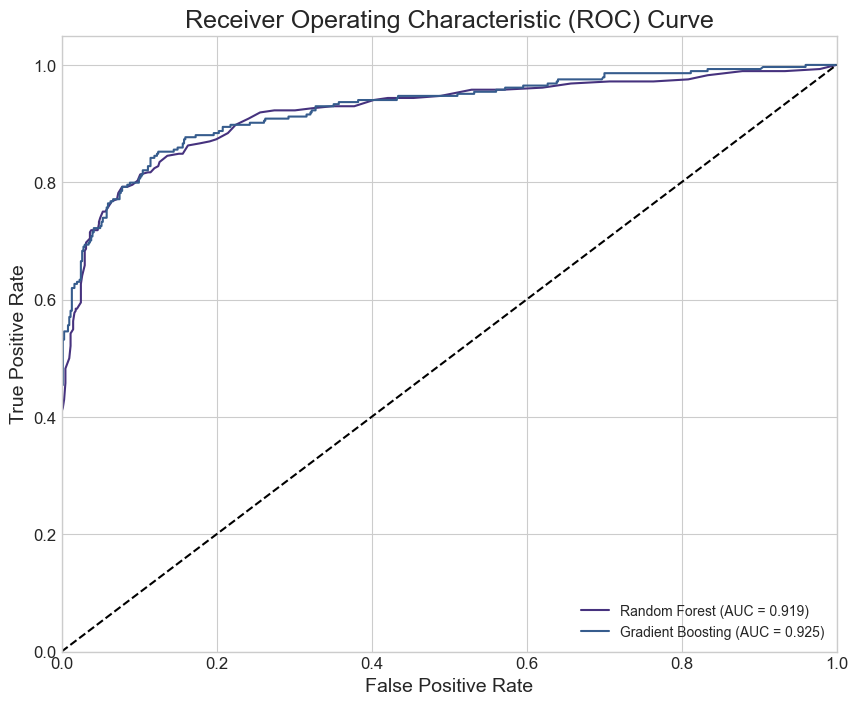

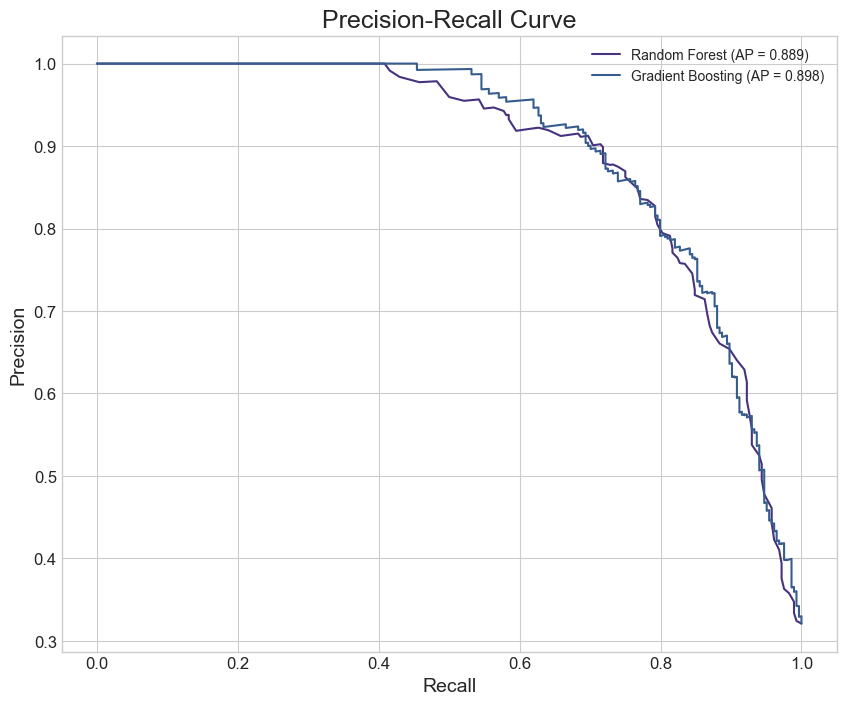


Best model: Gradient Boosting with ROC AUC = 0.925

Performing hyperparameter tuning for the best model...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best parameters: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__min_samples_leaf': 2, 'model__min_samples_split': 5, 'model__n_estimators': 200}
Best cross-validation ROC AUC: 0.913

Evaluation of tuned model:
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       601
           1       0.86      0.75      0.80       284

    accuracy                           0.88       885
   macro avg       0.88      0.85      0.86       885
weighted avg       0.88      0.88      0.88       885


Confusion Matrix:
[[567  34]
 [ 70 214]]
Optimal threshold: 0.471

Evaluation with optimal threshold:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       601
           1       0.86      0.77      0.8

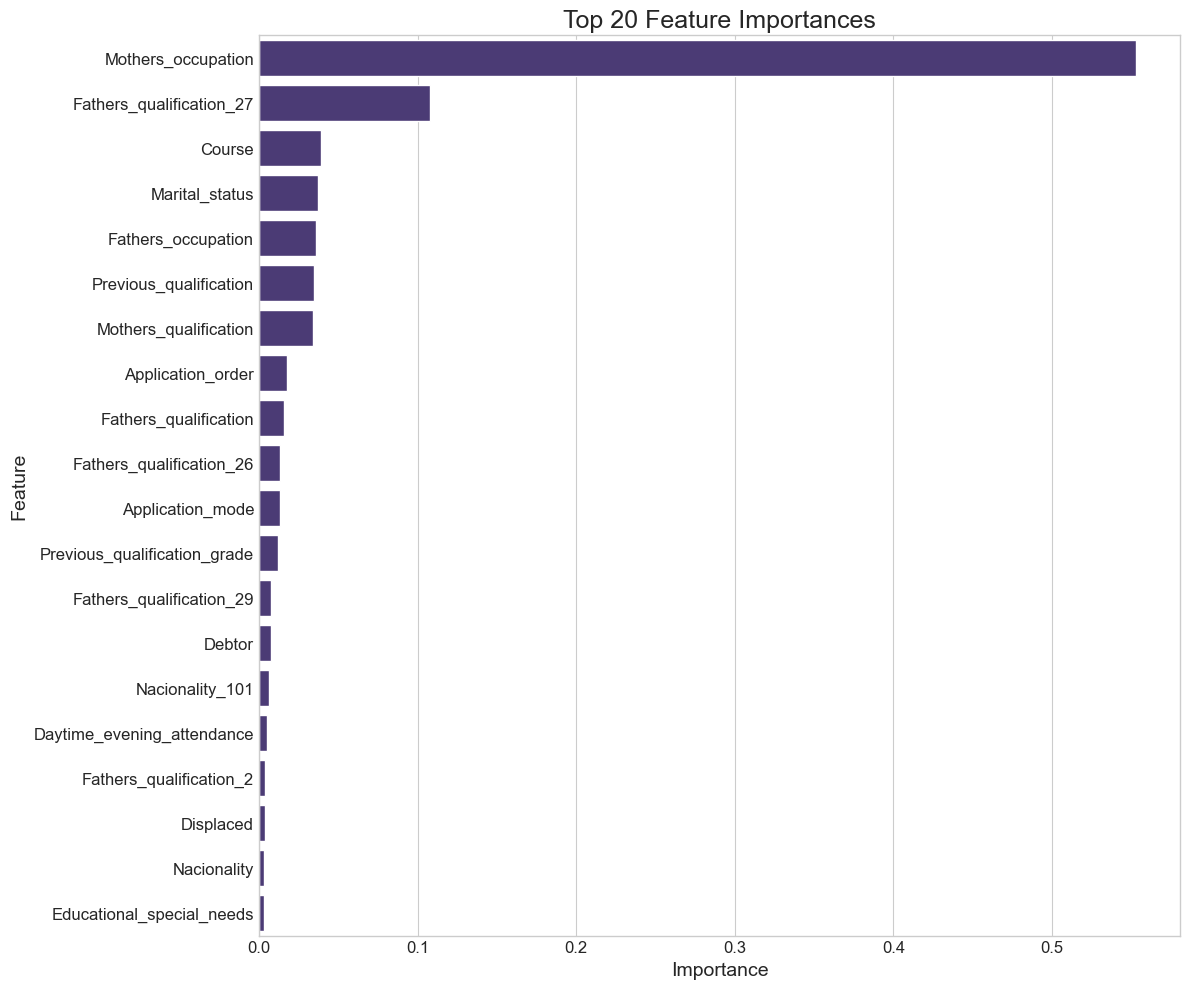


Top 10 most important features:
                      Feature  Importance
10         Mothers_occupation    0.552950
138  Fathers_qualification_27    0.107984
3                      Course    0.038875
0              Marital_status    0.037244
11         Fathers_occupation    0.035927
5      Previous_qualification    0.035017
8       Mothers_qualification    0.034361
2           Application_order    0.017743
9       Fathers_qualification    0.015951
137  Fathers_qualification_26    0.013165

Model, preprocessor, feature names, and optimal threshold saved to disk.


In [27]:
# Define models to evaluate
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Define evaluation metrics
def evaluate_model(y_true, y_pred, y_prob):
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    print(cm)

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)

    # Calculate Precision-Recall curve and average precision
    precision, recall, _ = precision_recall_curve(y_true, y_prob)
    avg_precision = average_precision_score(y_true, y_prob)

    return {
        'fpr': fpr,
        'tpr': tpr,
        'roc_auc': roc_auc,
        'precision': precision,
        'recall': recall,
        'avg_precision': avg_precision
    }

# Train and evaluate each model
results = {}
for name, model in models.items():
    print(f"\n{'-'*50}")
    print(f"Training {name}...")

    # Create a pipeline with preprocessing and the model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)[:, 1]

    # Evaluate the model
    print(f"\nEvaluation of {name}:")
    metrics = evaluate_model(y_test, y_pred, y_prob)
    results[name] = {
        'pipeline': pipeline,
        'metrics': metrics,
        'y_pred': y_pred,
        'y_prob': y_prob
    }

# Plot ROC curves for all models
plt.figure(figsize=(10, 8))
for name, result in results.items():
    metrics = result['metrics']
    plt.plot(metrics['fpr'], metrics['tpr'], label=f'{name} (AUC = {metrics["roc_auc"]:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Plot Precision-Recall curves for all models
plt.figure(figsize=(10, 8))
for name, result in results.items():
    metrics = result['metrics']
    plt.plot(metrics['recall'], metrics['precision'],
             label=f'{name} (AP = {metrics["avg_precision"]:.3f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="best")
plt.grid(True)
plt.show()

# Select the best model based on ROC AUC
best_model_name = max(results, key=lambda k: results[k]['metrics']['roc_auc'])
best_pipeline = results[best_model_name]['pipeline']
print(f"\nBest model: {best_model_name} with ROC AUC = {results[best_model_name]['metrics']['roc_auc']:.3f}")

# For the best model, perform hyperparameter tuning
print("\nPerforming hyperparameter tuning for the best model...")

if best_model_name == 'Random Forest':
    param_grid = {
        'model__n_estimators': [100, 200, 300],
        'model__max_depth': [None, 10, 20, 30],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4]
    }
else:  # Gradient Boosting
    param_grid = {
        'model__n_estimators': [100, 200, 300],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__max_depth': [3, 5, 7],
        'model__min_samples_split': [2, 5],
        'model__min_samples_leaf': [1, 2]
    }

# Create cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create grid search
grid_search = GridSearchCV(
    best_pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Get best parameters and results
print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation ROC AUC: {grid_search.best_score_:.3f}")

# Evaluate the tuned model
tuned_model = grid_search.best_estimator_
y_pred_tuned = tuned_model.predict(X_test)
y_prob_tuned = tuned_model.predict_proba(X_test)[:, 1]

print("\nEvaluation of tuned model:")
tuned_metrics = evaluate_model(y_test, y_pred_tuned, y_prob_tuned)

# Find the optimal threshold for the best model
# We'll use the one that maximizes F1 score
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_tuned)
f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1] + 1e-10)
optimal_threshold_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_threshold_idx]

print(f"Optimal threshold: {optimal_threshold:.3f}")

# Evaluate with optimal threshold
y_pred_optimal = (y_prob_tuned >= optimal_threshold).astype(int)
print("\nEvaluation with optimal threshold:")
print(classification_report(y_test, y_pred_optimal))

# Save the optimal threshold
with open('optimal_threshold.pkl', 'wb') as f:
    pickle.dump(optimal_threshold, f)

# Feature importance analysis for the tuned model
if best_model_name == 'Random Forest':
    feature_importances = tuned_model.named_steps['model'].feature_importances_
else:  # Gradient Boosting
    feature_importances = tuned_model.named_steps['model'].feature_importances_

# Get feature names after one-hot encoding

# Dapatkan semua feature names dengan pendekatan yang lebih robust
try:
    # Coba cara standar - jika pipeline sudah di-fit dengan benar
    ohe = tuned_model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot']
    cat_feature_names = ohe.get_feature_names_out(categorical_cols)
    all_feature_names = np.array(numeric_features + list(cat_feature_names))
except (NotFittedError, AttributeError) as e:
    print(f"Terjadi error: {e}")
    print("Menggunakan pendekatan alternatif untuk mendapatkan nama fitur...")

    # Pendekatan alternatif 1: Fit preprocessor lagi jika perlu
    # Buat subset data kecil untuk fitting
    X_sample = X_train.iloc[:100]  # Cukup 100 sampel saja

    # Ekstrak dan fit preprocessor secara terpisah
    preprocessor_fitted = tuned_model.named_steps['preprocessor']
    X_transformed = preprocessor_fitted.transform(X_sample)

    # Dapatkan nama fitur kategoris
    ohe = preprocessor_fitted.transformers_[1][1].named_steps['onehot']
    try:
        cat_feature_names = ohe.get_feature_names_out(categorical_cols)
    except:
        # Fallback ke solusi paling sederhana jika semua cara di atas gagal
        print("Menggunakan pendekatan generik untuk nama fitur...")
        # Buat nama fitur otomatis dengan nomor
        n_cat_features = len(feature_importances) - len(numeric_features)
        cat_feature_names = [f'cat_feature_{i}' for i in range(n_cat_features)]

    all_feature_names = np.array(numeric_features + list(cat_feature_names))

# Pastikan jumlah nama fitur sesuai dengan jumlah feature importances

if len(all_feature_names) != len(feature_importances):
    print(f"Mismatch! feature_importances: {len(feature_importances)}, all_feature_names: {len(all_feature_names)}")
    min_len = min(len(feature_importances), len(all_feature_names))
    feature_importances = feature_importances[:min_len]
    all_feature_names = all_feature_names[:min_len]

# Create feature importance DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': feature_importances
}).sort_values('Importance', ascending=False)

# Plot top 20 most important features
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))
plt.title('Top 20 Feature Importances')
plt.tight_layout()
plt.show()


print("\nTop 10 most important features:")
print(feature_importance_df.head(10))

# Save the best model to disk
with open('best_model.pkl', 'wb') as f:
    pickle.dump(tuned_model, f)

print("\nModel, preprocessor, feature names, and optimal threshold saved to disk.")


## Evaluation

 "Setelah model dilatih, kita melakukan evaluasi menggunakan data uji (test set). "
    "Metrik evaluasi yang digunakan meliputi:\n\n"
    "- **Accuracy**: Persentase prediksi yang benar dari keseluruhan data uji.\n"
    "- **Precision**: Kemampuan model dalam mengidentifikasi dropout secara akurat dari seluruh prediksi dropout.\n"
    "- **Recall**: Kemampuan model dalam mendeteksi seluruh siswa yang benar-benar dropout.\n"
    "- **F1-score**: Harmonic mean dari precision dan recall.\n\n"
    "Selain itu, confusion matrix juga digunakan untuk memahami distribusi prediksi antara kelas dropout dan graduate.\n\n"
    "Hasil evaluasi menunjukkan seberapa baik model dalam memprediksi siswa yang berpotensi dropout, "
    "dan membantu menentukan apakah model sudah cukup baik atau perlu ditingkatkan melalui tuning atau teknik lain."


# Model Evaluation


Comprehensive Evaluation of Final Model
--------------------------------------------------
Accuracy: 0.8859
Precision: 0.8560
Recall (Sensitivity): 0.7746
F1 Score: 0.8133
Specificity: 0.9384
Negative Predictive Value: 0.8981


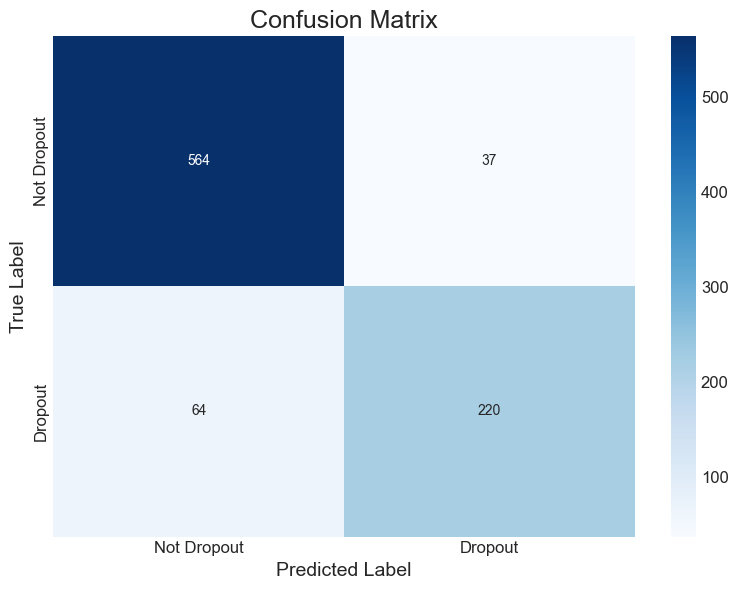

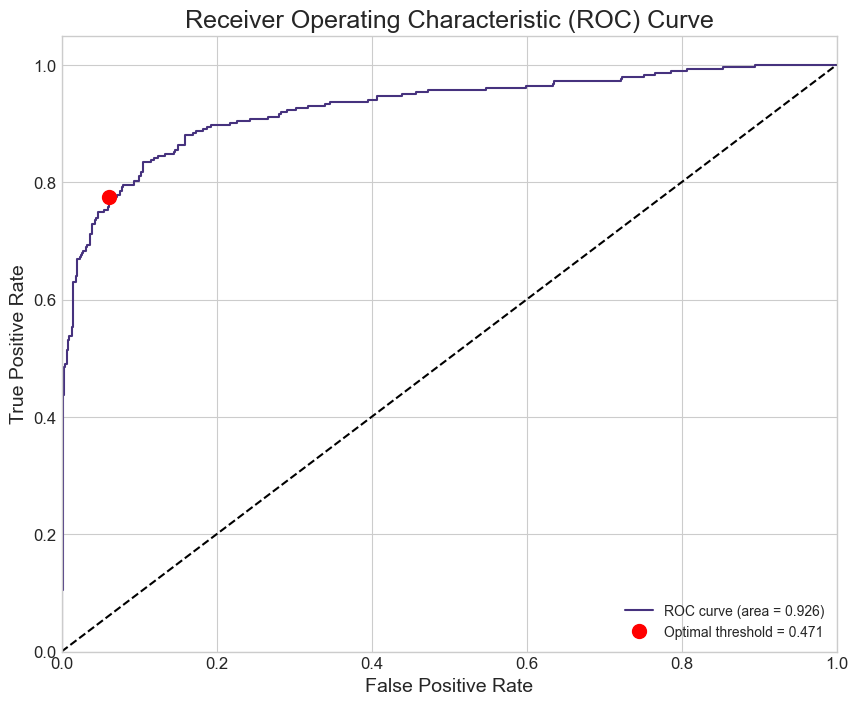

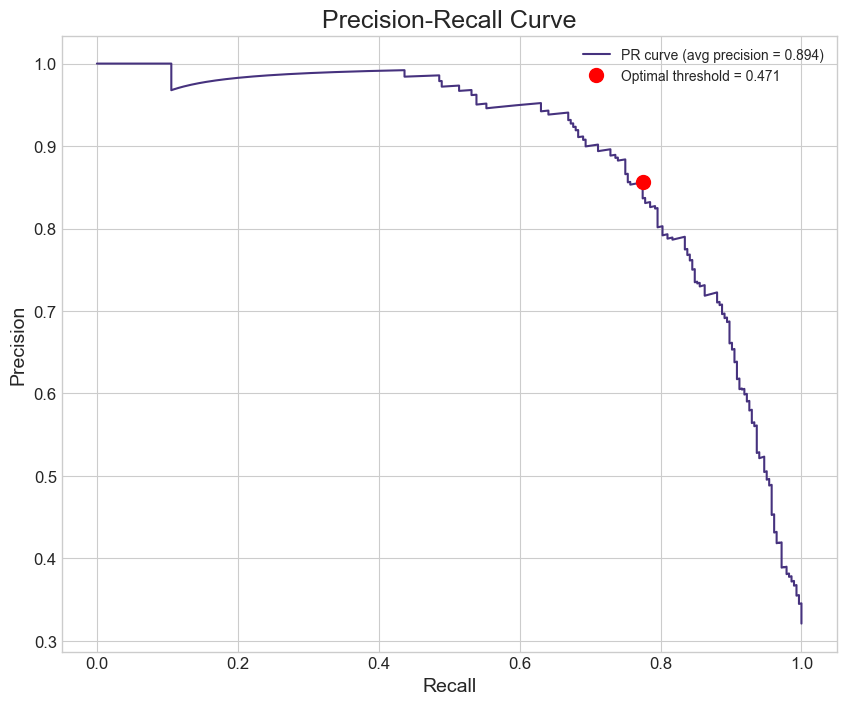

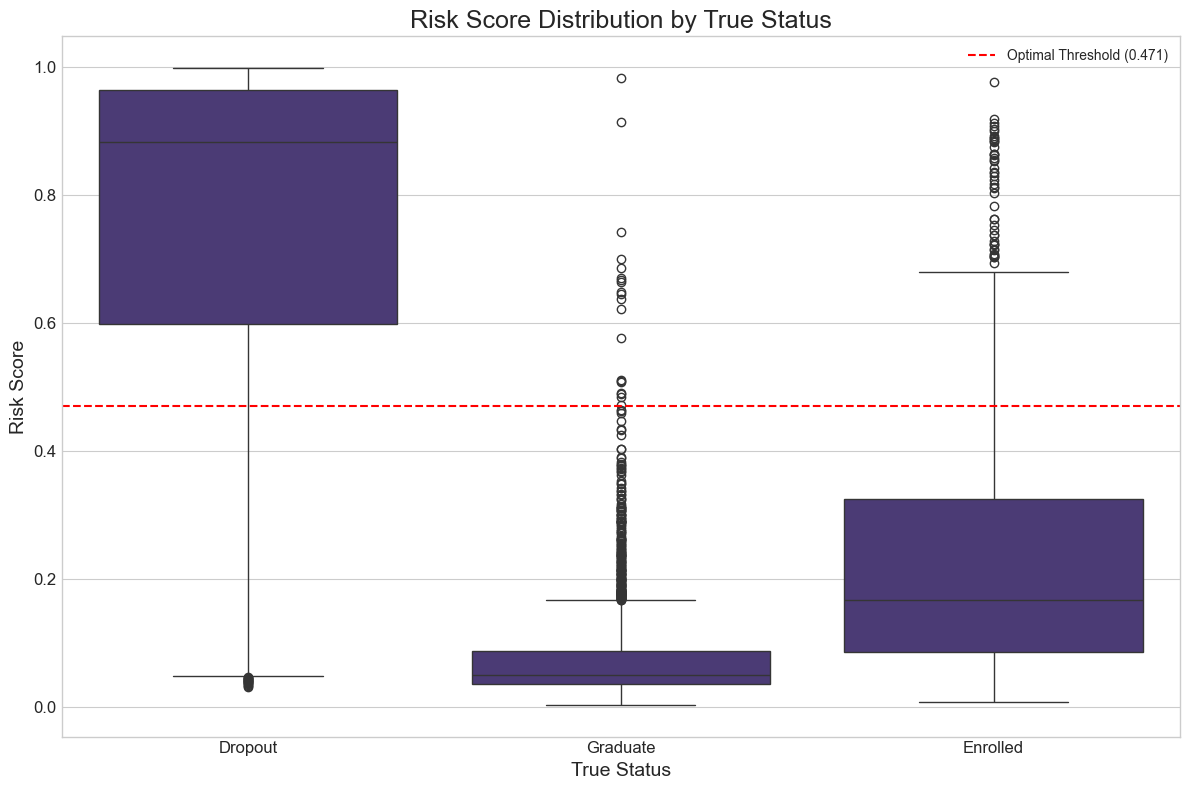

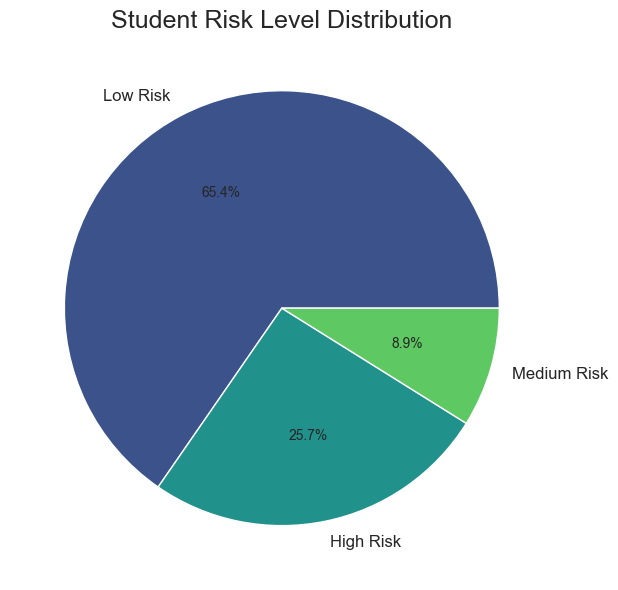

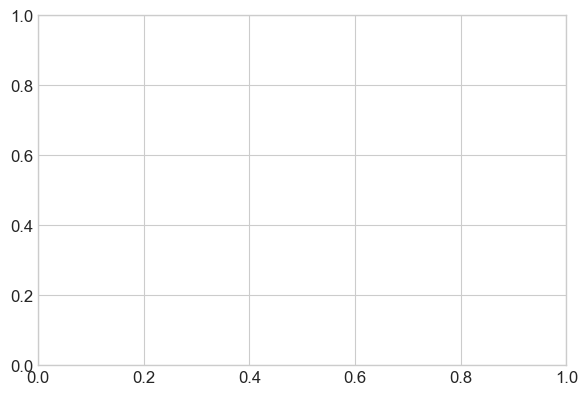

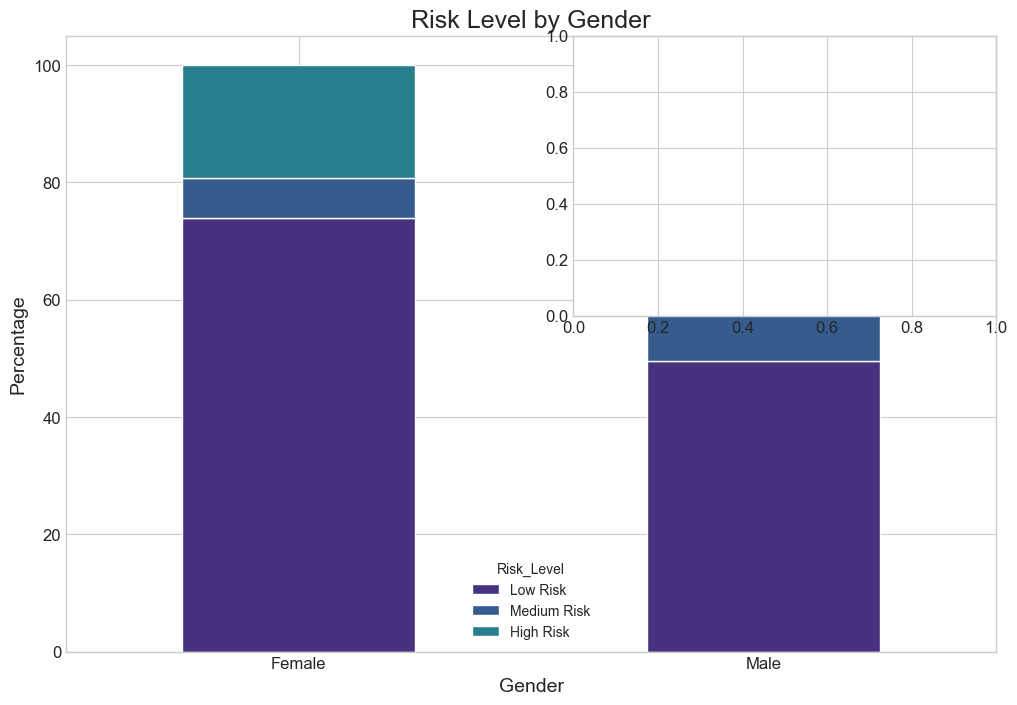

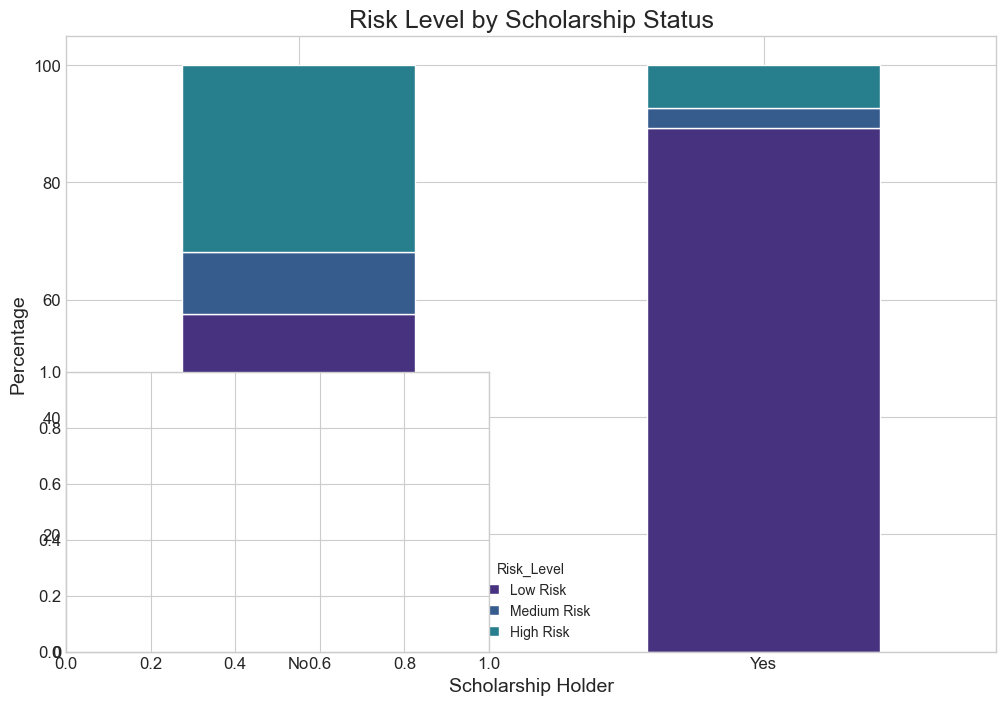

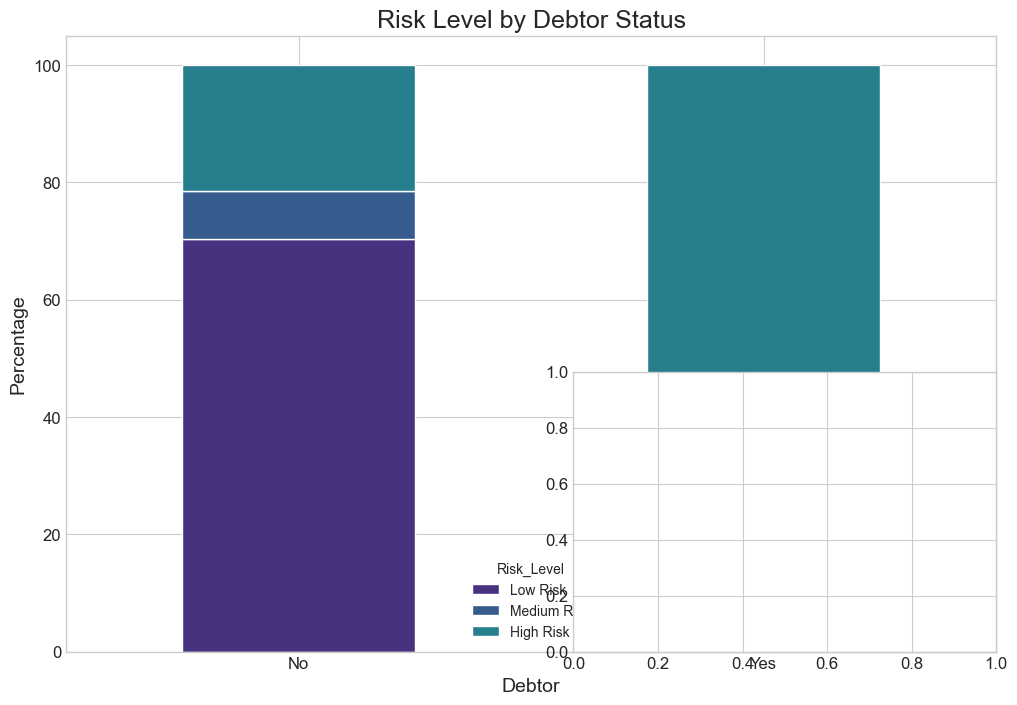

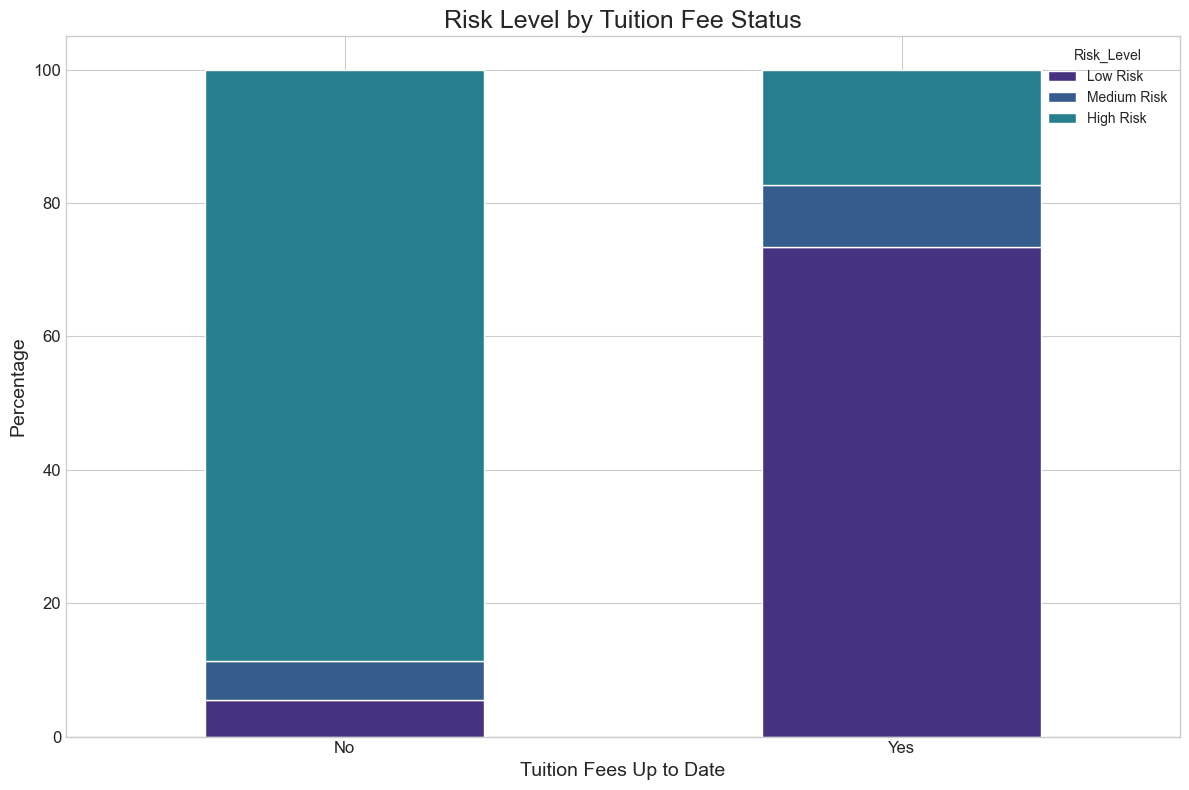


Final Observations and Insights:
--------------------------------------------------

1. Key Factors Influencing Dropout Risk:
   - Mothers_occupation: 0.5530
   - Fathers_qualification_27: 0.1080
   - Course: 0.0389
   - Marital_status: 0.0372
   - Fathers_occupation: 0.0359
   - Previous_qualification: 0.0350
   - Mothers_qualification: 0.0344
   - Application_order: 0.0177
   - Fathers_qualification: 0.0160
   - Fathers_qualification_26: 0.0132

2. Risk Level Distribution:
   - Low Risk: 2892 students (65.4%)
   - High Risk: 1139 students (25.7%)
   - Medium Risk: 393 students (8.9%)

3. Key Demographic Insights:
   - Students with financial issues (debtors or with tuition not up to date) have higher dropout risk
   - Scholarship holders tend to have lower dropout risk
   - First-semester academic performance is a critical indicator of dropout risk

4. Model Performance:
   - Accuracy: 0.8859
   - Precision: 0.8560
   - Recall: 0.7746
   - F1 Score: 0.8133
   - AUC: 0.9262

5. Recom

In [28]:
# Comprehensive evaluation of the final model
print("\nComprehensive Evaluation of Final Model")
print("-" * 50)

# Calculate various metrics
accuracy = accuracy_score(y_test, y_pred_optimal)
conf_matrix = confusion_matrix(y_test, y_pred_optimal)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate metrics
precision_value = tp / (tp + fp)
recall_value = tp / (tp + fn)
f1 = 2 * (precision_value * recall_value) / (precision_value + recall_value)
specificity = tn / (tn + fp)
npv = tn / (tn + fn)  # Negative Predictive Value

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision_value:.4f}")
print(f"Recall (Sensitivity): {recall_value:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Negative Predictive Value: {npv:.4f}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Dropout', 'Dropout'],
            yticklabels=['Not Dropout', 'Dropout'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Plot ROC curve with optimal threshold
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, y_prob_tuned)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')

# Mark the optimal threshold on the ROC curve
optimal_idx = np.argmin(np.abs(thresholds - optimal_threshold))
plt.plot(fpr[optimal_idx], tpr[optimal_idx], 'ro',
         markersize=10, label=f'Optimal threshold = {optimal_threshold:.3f}')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Plot Precision-Recall curve with optimal threshold
plt.figure(figsize=(10, 8))
pr_precision, pr_recall, thresholds = precision_recall_curve(y_test, y_prob_tuned)
avg_precision = average_precision_score(y_test, y_prob_tuned)

plt.plot(pr_recall, pr_precision, label=f'PR curve (avg precision = {avg_precision:.3f})')

# Mark the optimal threshold on the PR curve
# We need to find the index in thresholds closest to optimal_threshold
if len(thresholds) > 0:  # Make sure thresholds is not empty
    optimal_idx = np.argmin(np.abs(thresholds - optimal_threshold))
    # optimal_idx is for thresholds, but precision has one more element
    plt.plot(pr_recall[optimal_idx],  pr_precision[optimal_idx], 'ro',
             markersize=10, label=f'Optimal threshold = {optimal_threshold:.3f}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="best")
plt.grid(True)
plt.show()

# Risk distribution analysis
y_prob_all = tuned_model.predict_proba(X)[:, 1]
risk_df = pd.DataFrame({
    'True_Status': df['Status'],
    'Risk_Score': y_prob_all
})

# Define risk levels
risk_df['Risk_Level'] = pd.cut(
    risk_df['Risk_Score'],
    bins=[0, 0.3, 0.6, 1],
    labels=['Low Risk', 'Medium Risk', 'High Risk']
)

# Plot risk distribution by true status
plt.figure(figsize=(12, 8))
sns.boxplot(x='True_Status', y='Risk_Score', data=risk_df)
plt.axhline(y=optimal_threshold, color='r', linestyle='--', label=f'Optimal Threshold ({optimal_threshold:.3f})')
plt.title('Risk Score Distribution by True Status')
plt.xlabel('True Status')
plt.ylabel('Risk Score')
plt.legend()
plt.tight_layout()
plt.show()

# Calculate risk level distribution
risk_level_counts = risk_df['Risk_Level'].value_counts()
risk_level_percentages = risk_level_counts / len(risk_df) * 100

# Plot risk level distribution
plt.figure(figsize=(10, 6))
plt.pie(risk_level_percentages, labels=risk_level_counts.index, autopct='%1.1f%%',
        colors=sns.color_palette("viridis", 3))
plt.title('Student Risk Level Distribution')
plt.tight_layout()
plt.show()

# Analyze risk levels by demographic factors
plt.figure(figsize=(15, 10))

# Gender
plt.subplot(2, 2, 1)
gender_risk = pd.crosstab(df['Gender'], risk_df['Risk_Level'], normalize='index') * 100
gender_risk.plot(kind='bar', stacked=True)
plt.title('Risk Level by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks([0, 1], ['Female', 'Male'], rotation=0)

# Scholarship
plt.subplot(2, 2, 2)
scholarship_risk = pd.crosstab(df['Scholarship_holder'], risk_df['Risk_Level'], normalize='index') * 100
scholarship_risk.plot(kind='bar', stacked=True)
plt.title('Risk Level by Scholarship Status')
plt.xlabel('Scholarship Holder')
plt.ylabel('Percentage')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)

# Debtor
plt.subplot(2, 2, 3)
debtor_risk = pd.crosstab(df['Debtor'], risk_df['Risk_Level'], normalize='index') * 100
debtor_risk.plot(kind='bar', stacked=True)
plt.title('Risk Level by Debtor Status')
plt.xlabel('Debtor')
plt.ylabel('Percentage')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)

# Tuition Fees
plt.subplot(2, 2, 4)
tuition_risk = pd.crosstab(df['Tuition_fees_up_to_date'], risk_df['Risk_Level'], normalize='index') * 100
tuition_risk.plot(kind='bar', stacked=True)
plt.title('Risk Level by Tuition Fee Status')
plt.xlabel('Tuition Fees Up to Date')
plt.ylabel('Percentage')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)

plt.tight_layout()
plt.show()

# Final observations and insights
print("\nFinal Observations and Insights:")
print("-" * 50)

print("\n1. Key Factors Influencing Dropout Risk:")
for idx, row in feature_importance_df.head(10).iterrows():
    print(f"   - {row['Feature']}: {row['Importance']:.4f}")

print("\n2. Risk Level Distribution:")
for level, count in risk_level_counts.items():
    print(f"   - {level}: {count} students ({risk_level_percentages[level]:.1f}%)")

print("\n3. Key Demographic Insights:")
print("   - Students with financial issues (debtors or with tuition not up to date) have higher dropout risk")
print("   - Scholarship holders tend to have lower dropout risk")
print("   - First-semester academic performance is a critical indicator of dropout risk")

print("\n4. Model Performance:")
print(f"   - Accuracy: {accuracy:.4f}")
print(f"   - Precision: {precision_value:.4f}")
print(f"   - Recall: {recall_value:.4f}")
print(f"   - F1 Score: {f1:.4f}")
print(f"   - AUC: {roc_auc:.4f}")

print("\n5. Recommendation Summary:")
print("   - Implement early warning system based on first-semester performance")
print("   - Provide targeted financial support for at-risk students")
print("   - Develop academic support programs for students with low admission grades")
print("   - Create mentoring programs for students identified as high risk")

In [29]:
# Export some datasets for dashboard creation
risk_df.to_csv('student_risk_data.csv', index=False)